In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import scipy as scp

In [2]:
ligand_feat = pd.read_csv('../50_clust_ligand_feat.csv',sep='\t',header=0,index_col=0)
ligand_feat.head()

,mol2_path,pdb_path,name,smi,bin,formula,MW,logp,charge,has_phosphate,has_furanose,has_pyranose,has_sterol,has_benzene,has_halide,has_sulfonate,has_DNA_base,path,cluster
id,,,,,,,,,,,,,,,,,,,
AEE,/home/basantab/NTF2_project/20191216_deNovoNTF...,/home/basantab/NTF2_project/20191216_deNovoNTF...,6-{4-[(4-ethylpiperazin-1-yl)methyl]phenyl}-n-...,CCN1CCN(CC1)Cc2ccc(cc2)c3cc4c([nH]3)ncnc4NC(C)...,0,C27 H32 N6,462.439899,2.10130,2.0,False,False,False,False,True,False,False,False,/home/basantab/NTF2_project/20191216_deNovoNTF...,47
5XE,/home/basantab/NTF2_project/20191216_deNovoNTF...,/home/basantab/NTF2_project/20191216_deNovoNTF...,"4-bromanyl-~{n}-(6-methoxy-1,3-dimethyl-2-oxid...",Cc1cc(ccc1S(=O)(=O)Nc2cc3c(cc2OC)N(C(=O)N3C)C)Br,0,C17 H18 Br N3 O4 S,389.251958,0.78862,0.0,False,False,False,False,True,True,False,False,/home/basantab/NTF2_project/20191216_deNovoNTF...,4
M7B,/home/basantab/NTF2_project/20191216_deNovoNTF...,/home/basantab/NTF2_project/20191216_deNovoNTF...,7-o-phosphono-d-glycero-beta-d-manno-heptopyra...,C(C(C1C(C(C(C(O1)O)O)O)O)O)OP(=O)(O)O,0,C7 H15 O10 P,292.055933,-6.07770,-2.0,True,False,True,False,False,False,False,False,/home/basantab/NTF2_project/20191216_deNovoNTF...,32
9U4,/home/basantab/NTF2_project/20191216_deNovoNTF...,/home/basantab/NTF2_project/20191216_deNovoNTF...,3-[7-(difluoromethyl)-6-(1-methyl-1h-pyrazol-4...,CNC(=O)N1CCc2c(c(nn2C3CCOCC3)N4CCCc5c4cc(c(c5)...,0,C27 H33 F2 N7 O2,541.391580,4.35450,-0.0,False,False,True,False,True,True,False,False,/home/basantab/NTF2_project/20191216_deNovoNTF...,37
MTT,/home/basantab/NTF2_project/20191216_deNovoNTF...,/home/basantab/NTF2_project/20191216_deNovoNTF...,maltotetraose,C(C1C(C(C(C(O1)OC2C(OC(C(C2O)O)OC3C(OC(C(C3O)O...,0,C24 H42 O21,666.221858,-9.74880,0.0,False,False,True,False,False,False,False,False,/home/basantab/NTF2_project/20191216_deNovoNTF...,38


In [3]:
columns_all_docks = ['ligand','rif','score:','score','rank:','rank','dist0:','dist0','packscore:','packscore',\
                    'score2:','score2','steric:','steric','cluster:','cluster','rifrank:','rifrank','unk','path']
all_docks_data = pd.read_csv('./full_RIFDOCK_data.csv', sep=' ', names=columns_all_docks)
all_docks_data['scaffold'] = all_docks_data.path.str.replace('rifdock_output/','').replace('_000._00000000.\.pdb.gz','',regex=True)
scaffold_set = set(all_docks_data['scaffold'])
is_native = { i:(i[0]=='d') for i in scaffold_set }
all_docks_data['is_native'] = [i for i in map(is_native.get, all_docks_data['scaffold'])]
all_docks_data.head()

,ligand,rif,score:,score,rank:,rank,dist0:,dist0,packscore:,packscore,...,steric:,steric,cluster:,cluster,rifrank:,rifrank,unk,path,scaffold,is_native
0,0FV,rif,score:,0,rank,0,dist0:,29.24,packscore:,-54.026,...,steric:,-3.477,cluster:,2,rifrank:,70952,0.13256,rifdock_output/d1gy6a__0001_000000000.pdb.gz,d1gy6a_,True
1,0FV,rif,score:,1,rank,3,dist0:,31.76,packscore:,-53.303,...,steric:,-2.905,cluster:,3,rifrank:,159283,0.29758,rifdock_output/d1gy6a__0001_000000001.pdb.gz,d1gy6a_,True
2,0FV,rif,score:,2,rank,7,dist0:,28.83,packscore:,-52.396,...,steric:,-2.988,cluster:,1,rifrank:,273020,0.51007,rifdock_output/d1gy6a__0001_000000002.pdb.gz,d1gy6a_,True
3,0FV,rif,score:,3,rank,9,dist0:,34.12,packscore:,-51.634,...,steric:,-2.897,cluster:,7,rifrank:,597,0.00112,rifdock_output/d1gy6a__0001_000000003.pdb.gz,d1gy6a_,True
4,0FV,rif,score:,4,rank,17,dist0:,34.40,packscore:,-51.134,...,steric:,-3.090,cluster:,0,rifrank:,170,0.00032,rifdock_output/d1gy6a__0001_000000004.pdb.gz,d1gy6a_,True


In [4]:
ligand_features_dictionary = {i:ligand_feat.loc[all_docks_data.ligand][i].values for i in [j for j in ligand_feat.columns if j not in ["name","path"] ]}
all_docks_and_lig_dat = all_docks_data.assign(**ligand_features_dictionary)

all_docks_and_lig_dat.head()

,ligand,rif,score:,score,rank:,rank,dist0:,dist0,packscore:,packscore,...,logp,charge,has_phosphate,has_furanose,has_pyranose,has_sterol,has_benzene,has_halide,has_sulfonate,has_DNA_base
0,0FV,rif,score:,0,rank,0,dist0:,29.24,packscore:,-54.026,...,-0.8338,-3.0,True,False,False,False,False,True,False,False
1,0FV,rif,score:,1,rank,3,dist0:,31.76,packscore:,-53.303,...,-0.8338,-3.0,True,False,False,False,False,True,False,False
2,0FV,rif,score:,2,rank,7,dist0:,28.83,packscore:,-52.396,...,-0.8338,-3.0,True,False,False,False,False,True,False,False
3,0FV,rif,score:,3,rank,9,dist0:,34.12,packscore:,-51.634,...,-0.8338,-3.0,True,False,False,False,False,True,False,False
4,0FV,rif,score:,4,rank,17,dist0:,34.40,packscore:,-51.134,...,-0.8338,-3.0,True,False,False,False,False,True,False,False


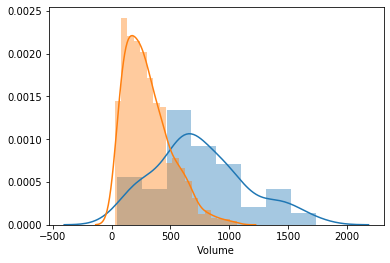

In [5]:
nat_pv = pd.read_csv('./native_pocket_volume.csv',index_col=0)
nd_scaffold_data = pd.read_csv('./docking_full_data.csv',index_col=0) 
nd_scaffold_data_rein = nd_scaffold_data.set_index(pd.Index([ i.split('/')[-1].replace('_0000.pdb','') for i in nd_scaffold_data.index ]))
sns.distplot(nat_pv.vol)
sns.distplot(nd_scaffold_data.Volume)

In [6]:
nat_vol_dict = nat_pv.to_dict()
nd_scaffold_data_dict = nd_scaffold_data_rein.to_dict()
all_volumes = {**nat_vol_dict['vol'], **nd_scaffold_data_dict['Volume']}
volume_df = pd.DataFrame.from_dict(all_volumes,orient='index',columns=['vol'])
volume_df.head()

,vol
d1gy6a_,592.000106
d1gy7a_,102.000000
d1hkxa_,978.000000
d1idpa_,1055.000189
d1m98a2,649.000000


In [7]:
all_docks_and_lig_dat['vol'] = volume_df.loc[all_docks_and_lig_dat.scaffold].vol.values

In [8]:
all_docks_and_lig_dat.columns

Index(['ligand', 'rif', 'score:', 'score', 'rank:', 'rank', 'dist0:', 'dist0',
       'packscore:', 'packscore', 'score2:', 'score2', 'steric:', 'steric',
       'cluster:', 'cluster', 'rifrank:', 'rifrank', 'unk', 'path', 'scaffold',
       'is_native', 'mol2_path', 'pdb_path', 'smi', 'bin', 'formula', 'MW',
       'logp', 'charge', 'has_phosphate', 'has_furanose', 'has_pyranose',
       'has_sterol', 'has_benzene', 'has_halide', 'has_sulfonate',
       'has_DNA_base', 'vol'],
      dtype='object')

In [9]:
high_qual_docks_df = all_docks_and_lig_dat
print(len(high_qual_docks_df))

227869


### Carbon count between de novo and native high quality docks

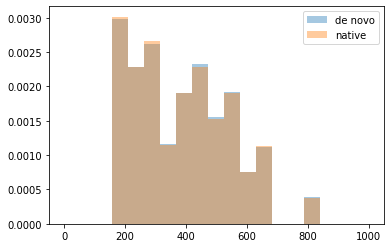

In [10]:
bins_nc = np.linspace(0,1000,20)
sns.distplot(high_qual_docks_df.loc[high_qual_docks_df.is_native==0].MW.values,kde=False,bins=bins_nc,norm_hist=True, label="de novo")
sns.distplot(high_qual_docks_df.loc[high_qual_docks_df.is_native==1].MW.values,kde=False,bins=bins_nc,norm_hist=True, label="native")
plt.legend()

### How many different high quality docks are there?

In [11]:
qdock_pop = np.array( [ len(high_qual_docks_df.loc[high_qual_docks_df.ligand == i]) \
                       for i in set(high_qual_docks_df.ligand)] )

Text(0.5, 0, 'Number of high-quality docks')

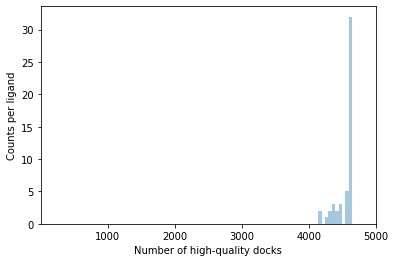

In [12]:
bins=np.linspace(1,5000,100)
sns.distplot(qdock_pop,bins=bins,kde=False)
plt.xlim(1,5000)
plt.ylabel('Counts per ligand')
plt.xlabel('Number of high-quality docks')

### Get best high-qual docks for each ligand

In [13]:
top_dict_1rep = {}
for i in set(high_qual_docks_df.ligand):
    thing = high_qual_docks_df.loc[(high_qual_docks_df.ligand == i)].\
            sort_values(by=['packscore']).iloc[0].to_dict()
    thing['qdocksn'] = len(high_qual_docks_df.loc[high_qual_docks_df.ligand==i])
    top_dict_1rep[i] = thing
    #print(thing)


In [14]:
top_docks_1rep_df = pd.DataFrame.from_dict(top_dict_1rep,orient='index')
print("Top docks that are de novo in 1 repetition: %d of 50 "%(sum((top_docks_1rep_df.is_native-1)*-1)))
print("Total number of scaffolds in top docks: %d"%(len(set(top_docks_1rep_df.scaffold))))

Top docks that are de novo in 1 repetition: 40 of 50 
Total number of scaffolds in top docks: 27


In [15]:
top_dict = {}
for i in set(high_qual_docks_df.ligand):
    thing = high_qual_docks_df.loc[(high_qual_docks_df.ligand == i)].\
            sort_values(by=['packscore']).iloc[0].to_dict()
    thing['qdocksn'] = len(high_qual_docks_df.loc[high_qual_docks_df.ligand==i])
    top_dict[i] = thing
top_docks_df = pd.DataFrame.from_dict(top_dict,orient='index')
top_docks_df.head()

,ligand,rif,score:,score,rank:,rank,dist0:,dist0,packscore:,packscore,...,has_phosphate,has_furanose,has_pyranose,has_sterol,has_benzene,has_halide,has_sulfonate,has_DNA_base,vol,qdocksn
P2H,P2H,rif,score:,0,rank,0,dist0:,14.77,packscore:,-81.156,...,False,False,False,False,True,False,False,False,398.000000,4645
GYP,GYP,rif,score:,0,rank,0,dist0:,16.75,packscore:,-46.816,...,False,False,True,False,False,False,False,False,403.000000,4183
MTT,MTT,rif,score:,0,rank,0,dist0:,17.92,packscore:,-54.511,...,False,False,True,False,False,False,False,False,849.000000,4343
M7B,M7B,rif,score:,0,rank,0,dist0:,17.36,packscore:,-59.312,...,True,False,True,False,False,False,False,False,904.000323,4177
TTG,TTG,rif,score:,0,rank,0,dist0:,12.57,packscore:,-84.842,...,False,False,False,False,True,False,False,False,1064.000381,4645


In [16]:
top_docks_df = pd.DataFrame.from_dict(top_dict,orient='index')
print("Top docks that are de novo in 1 repetition: %d of 50 "%(sum((top_docks_df.is_native-1)*-1)))
print("Total number of scaffolds in top docks: %d"%(len(set(top_docks_df.scaffold))))

Top docks that are de novo in 1 repetition: 40 of 50 
Total number of scaffolds in top docks: 27


In [17]:
sorted([(i,list(top_docks_df.scaffold).count(i)) for i in set(top_docks_df.scaffold) ],key=lambda x:x[1], reverse=True)

[('IPQZYEHY_BasicBeNTF2_designed', 13),
 ('RKZXMATG_BasicBeNTF2_designed', 4),
 ('ERSKGIDY_BasicBeNTF2_designed', 3),
 ('d2a15a1', 3),
 ('LIQUBIML_BasicBeNTF2_designed', 2),
 ('REKUFSSG_BasicBeNTF2_designed', 2),
 ('KNHUWXPL_BasicBeNTF2_designed', 2),
 ('d2gexa1', 2),
 ('EYCDFOJC_BasicBeNTF2_designed', 1),
 ('d2chca1', 1),
 ('NZTRNXKX_BasicBeNTF2_designed', 1),
 ('QAWTJNGV_BasicBeNTF2_designed', 1),
 ('AWPYPYWL_BasicBeNTF2_designed', 1),
 ('d3fgya_', 1),
 ('XBGMZVXW_BasicBeNTF2_designed', 1),
 ('MTNNCMGU_BasicBeNTF2_designed', 1),
 ('d3fsda_', 1),
 ('MYWJWGMP_BasicBeNTF2_designed', 1),
 ('d3dm8a1', 1),
 ('GESGWTXX_BasicBeNTF2_designed', 1),
 ('FYHLBYHS_BasicBeNTF2_designed', 1),
 ('CWSSYHKP_BasicBeNTF2_designed', 1),
 ('ZPONSKHM_BasicBeNTF2_designed', 1),
 ('KVTSDNGQ_BasicBeNTF2_designed', 1),
 ('HQHAOVYZ_BasicBeNTF2_designed', 1),
 ('d2gxfa1', 1),
 ('XXUZVSNH_BasicBeNTF2_designed', 1)]

In [18]:
top_docks_df.where(top_docks_df.scaffold=='IPQZYEHY_BasicBeNTF2_designed').dropna()

,ligand,rif,score:,score,rank:,rank,dist0:,dist0,packscore:,packscore,...,has_phosphate,has_furanose,has_pyranose,has_sterol,has_benzene,has_halide,has_sulfonate,has_DNA_base,vol,qdocksn
P2H,P2H,rif,score:,0.0,rank,0.0,dist0:,14.77,packscore:,-81.156,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,398.0,4645.0
DQX,DQX,rif,score:,0.0,rank,0.0,dist0:,16.43,packscore:,-73.667,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,398.0,4645.0
5XE,5XE,rif,score:,0.0,rank,0.0,dist0:,17.57,packscore:,-76.001,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,398.0,4645.0
EQU,EQU,rif,score:,0.0,rank,0.0,dist0:,17.15,packscore:,-60.468,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,398.0,4645.0
H1L,H1L,rif,score:,0.0,rank,0.0,dist0:,17.33,packscore:,-68.407,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,398.0,4645.0
BDD,BDD,rif,score:,0.0,rank,0.0,dist0:,17.66,packscore:,-47.055,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,398.0,4645.0
9U4,9U4,rif,score:,0.0,rank,0.0,dist0:,18.11,packscore:,-72.477,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,398.0,4645.0
F91,F91,rif,score:,0.0,rank,0.0,dist0:,20.75,packscore:,-52.826,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,398.0,4645.0
OBN,OBN,rif,score:,0.0,rank,0.0,dist0:,18.08,packscore:,-63.095,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,398.0,4617.0
DPV,DPV,rif,score:,0.0,rank,0.0,dist0:,17.88,packscore:,-65.657,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,398.0,4645.0


In [19]:
high_qual_docks_df.loc[(high_qual_docks_df.ligand=='EQU')].sort_values(by="packscore").head(20)

,ligand,rif,score:,score,rank:,rank,dist0:,dist0,packscore:,packscore,...,charge,has_phosphate,has_furanose,has_pyranose,has_sterol,has_benzene,has_halide,has_sulfonate,has_DNA_base,vol
116139,EQU,rif,score:,0,rank,0,dist0:,17.15,packscore:,-60.468,...,0.0,False,False,False,True,True,False,False,False,398.000000
115914,EQU,rif,score:,0,rank,0,dist0:,12.23,packscore:,-59.353,...,0.0,False,False,False,True,True,False,False,False,573.999795
115314,EQU,rif,score:,0,rank,0,dist0:,14.74,packscore:,-59.169,...,0.0,False,False,False,True,True,False,False,False,1064.000381
115315,EQU,rif,score:,1,rank,1,dist0:,14.62,packscore:,-58.998,...,0.0,False,False,False,True,True,False,False,False,1064.000381
115316,EQU,rif,score:,2,rank,3,dist0:,14.59,packscore:,-58.712,...,0.0,False,False,False,True,True,False,False,False,1064.000381
115317,EQU,rif,score:,3,rank,7,dist0:,14.84,packscore:,-58.470,...,0.0,False,False,False,True,True,False,False,False,1064.000381
118349,EQU,rif,score:,0,rank,0,dist0:,12.60,packscore:,-58.235,...,0.0,False,False,False,True,True,False,False,False,812.999709
115318,EQU,rif,score:,4,rank,10,dist0:,14.77,packscore:,-58.051,...,0.0,False,False,False,True,True,False,False,False,1064.000381
116879,EQU,rif,score:,0,rank,0,dist0:,13.97,packscore:,-57.610,...,0.0,False,False,False,True,True,False,False,False,670.000000
116140,EQU,rif,score:,1,rank,2,dist0:,17.60,packscore:,-57.519,...,0.0,False,False,False,True,True,False,False,False,398.000000


Ks_2sampResult(statistic=0.40770855698306613, pvalue=2.6381007747386442e-45)


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


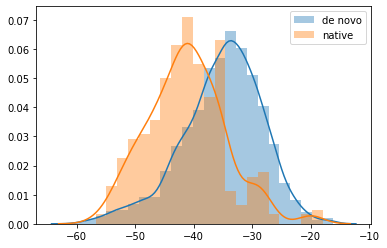

In [20]:
lig_name = 'EQU'
bins=np.linspace(min(high_qual_docks_df.loc[high_qual_docks_df.ligand==lig_name].packscore.values),\
                max(high_qual_docks_df.loc[high_qual_docks_df.ligand==lig_name].packscore.values),\
                25)
sns.distplot(high_qual_docks_df.loc[(high_qual_docks_df.ligand==lig_name)*(high_qual_docks_df.is_native==0)]\
             .packscore.values, bins=bins, label="de novo")
sns.distplot(high_qual_docks_df.loc[(high_qual_docks_df.ligand==lig_name)*(high_qual_docks_df.is_native==1)]\
             .packscore.values, bins=bins, label="native")
print(scp.stats.ks_2samp(high_qual_docks_df.loc[(high_qual_docks_df.ligand==lig_name)*(high_qual_docks_df.is_native==0)]\
             .packscore.values,high_qual_docks_df.loc[(high_qual_docks_df.ligand==lig_name)*(high_qual_docks_df.is_native==1)]\
             .packscore.values))
plt.legend()

### What is the advantage of de novo proteins over natives for the best dock of each ligand?
Here I look at Z-score differences between best de novo dock vs best native dock, for each ligand. Y = best_native_z - best_denovo_z

In [21]:
advantages_rd1 = {}
# For each liganf in the top docks with more than 10 docks:
for i in top_docks_1rep_df.loc[top_docks_1rep_df.qdocksn>10].index.values:
    # Make a DF from ALL high quality docks taking only the current ligand, the scaffold,
    # its IFE and whether it is de novo or not. Sort it by IFE (better IFE goes first).
    main = high_qual_docks_df.loc[(high_qual_docks_df.ligand==i)]\
    .sort_values(by=['packscore'])
    # Calculate the IFE Z-scores for all docks for this ligand
    main['zvals'] = scp.stats.zscore(main.packscore.values)
    # For this ligand, the "de novo advantage" is the difference between the Z-score of the
    # best native (first row of the current ligand main DF), minus the best de novo. E.g.: -2.0 - -1.0 = -1.0, i.e.,
    # the best native dock is 1.0 standard deviations better (lower IFE) than the best de novo.
    # Negative values mean a native protein docks this ligand better.
    advantages_rd1[i] = main.where(main.is_native==True).dropna()['zvals'].iloc[0] - \
                    main.where(main.is_native==False).dropna()['zvals'].iloc[0]

### Advantage by MW

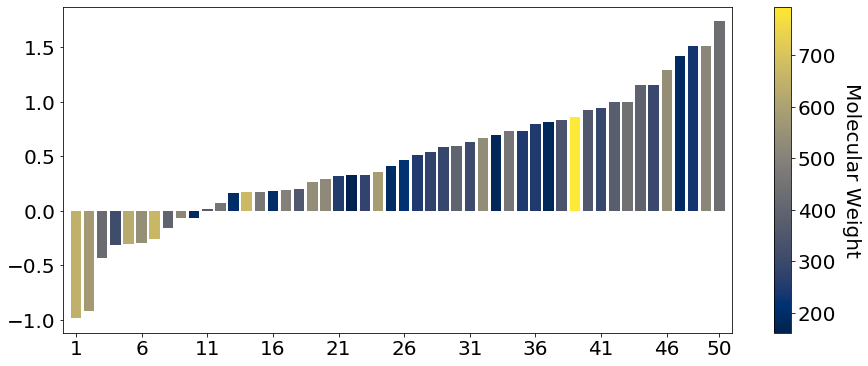

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
minimum = min(ligand_feat.MW.values)
maximum = max(ligand_feat.MW.values)


cm_subsection = (np.array([ ligand_feat.loc[i[0]].MW for i in \
                sorted(advantages_rd1.items(),key=lambda x:x[1]) ])-minimum\
                )/(maximum-minimum)
colors = [ plt.cm.cividis(x) for x in cm_subsection ]
plt.bar([i+1 for i in range(len(advantages_rd1.items()))],[i[1] for i in sorted(advantages_rd1.items(),key=lambda x:x[1])]\
        ,color=colors)

my_cmap = plt.cm.get_cmap('cividis')
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(minimum,maximum))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Molecular Weight', rotation=270,labelpad=25,size=20)
cbar.ax.tick_params(labelsize=20) 

plt.xticks(list(np.arange(1, 50, 5.0))+[50])
ax.tick_params(axis="both", labelsize=20)
plt.xlim(0,51)
plt.show()


In [23]:
plt.colorbar?

### Advantage by hydrophobicity (logp)

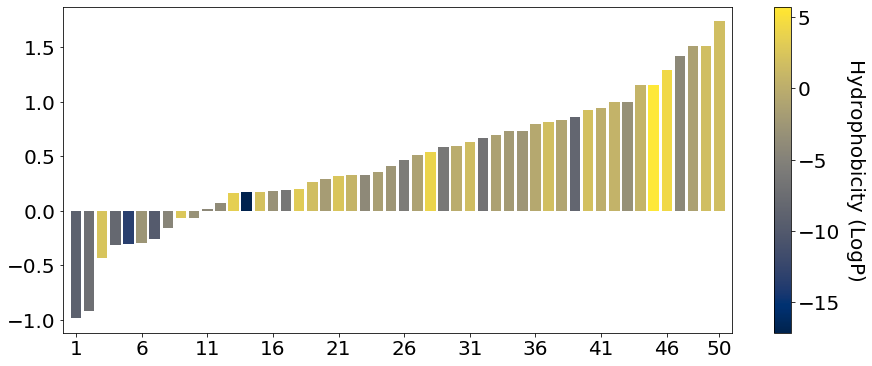

In [24]:
fig, ax = plt.subplots(figsize=(15,6))

minimum = min(ligand_feat.logp.values)
maximum = max(ligand_feat.logp.values)
cm_subsection = (np.array([ ligand_feat.loc[i[0]].logp for i in \
                sorted(advantages_rd1.items(),key=lambda x:x[1]) ])-minimum\
                )/(maximum-minimum)
colors = [ plt.cm.cividis(x) for x in cm_subsection ]
plt.bar([i+1 for i in range(len(advantages_rd1.items()))],[i[1] for i in sorted(advantages_rd1.items(),key=lambda x:x[1])]\
        ,color=colors)

my_cmap = plt.cm.get_cmap('cividis')
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(minimum,maximum))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Hydrophobicity (LogP)', rotation=270,labelpad=25,size=20)

plt.xticks(list(np.arange(1, 50, 5.0))+[50])
ax.tick_params(axis="both", labelsize=20)
plt.xlim(0,51)
plt.show()

In [25]:
cbar.set_label

<bound method ColorbarBase.set_label of <matplotlib.colorbar.Colorbar object at 0x7fffc1e5acd0>>

### Advantage by charge

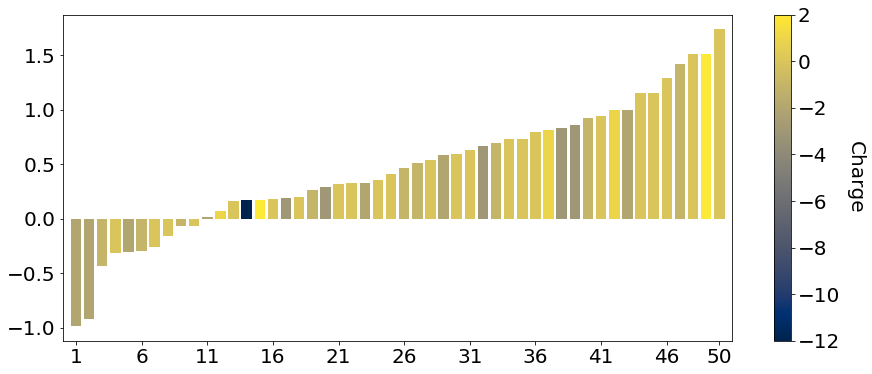

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
measured_ligs = top_docks_df.loc[top_docks_1rep_df.qdocksn>10].index.values
minimum = min(ligand_feat.charge.values)
maximum = max(ligand_feat.charge.values)
cm_subsection = (np.array([ ligand_feat.loc[i[0]].charge for i in \
                sorted(advantages_rd1.items(),key=lambda x:x[1]) ])-minimum\
                )/(maximum-minimum)
colors = [ plt.cm.cividis(x) for x in cm_subsection ]
plt.bar([i+1 for i in range(len(advantages_rd1.items()))],[i[1] for i in sorted(advantages_rd1.items(),key=lambda x:x[1])]\
        ,color=colors)

my_cmap = plt.cm.get_cmap('cividis')
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(minimum,maximum))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Charge', rotation=270,labelpad=25,size=20)

plt.xticks(list(np.arange(1, 50, 5.0))+[50])
ax.tick_params(axis="both", labelsize=20)

plt.xlim(0,51)
plt.show()


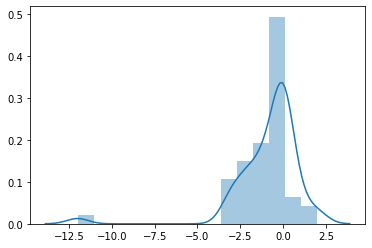

In [27]:
sns.distplot(ligand_feat.charge.values)

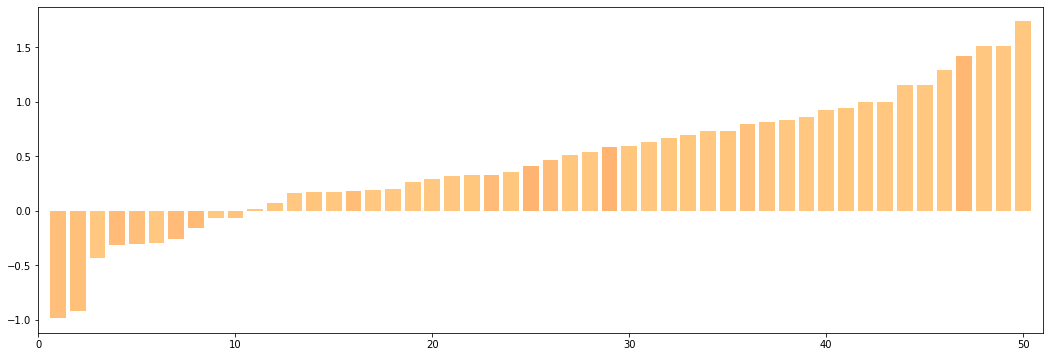

In [28]:
fig, ax = plt.subplots(figsize=(18,6))
minimum = 18
cm_subsection = (np.array([ top_docks_1rep_df.loc[i[0]].qdocksn for i in \
                sorted(advantages_rd1.items(),key=lambda x:x[1]) ])-minimum)\
                /(max(top_docks_1rep_df.qdocksn.values-minimum))
colors = [ plt.cm.copper(x) for x in cm_subsection ]
tick_label=[i[0] for i in sorted(advantages_rd1.items(),key=lambda x:x[1]) ]
plt.bar([i+1 for i in range(len(advantages_rd1.items()))],[i[1] for i in sorted(advantages_rd1.items(),key=lambda x:x[1])]\
        ,color=colors,tick_label=None)
#plt.xticks(rotation=90)
plt.xlim(0,51)
plt.show()
#high_qual_docks_df.where(high_qual_docks_df.ligand=='3qxt').dropna()[['scaffold','IFE','isdenovo']]

### What ligand properties make them better bound by natives or de novo scaffolds?

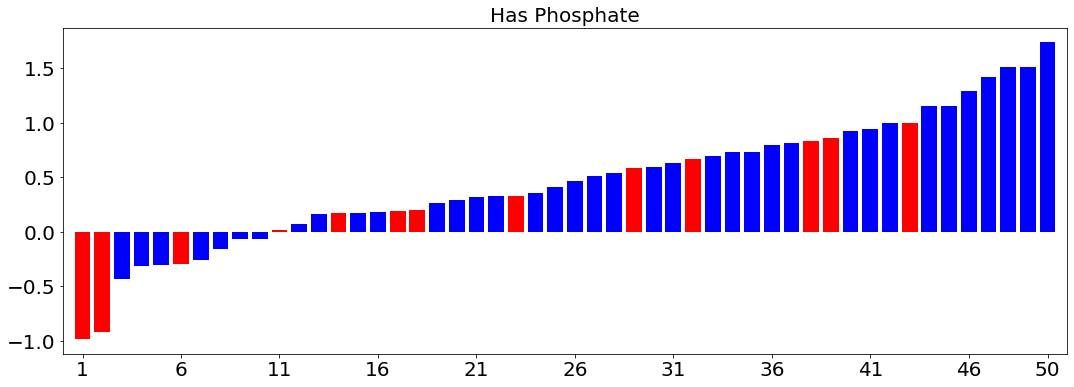

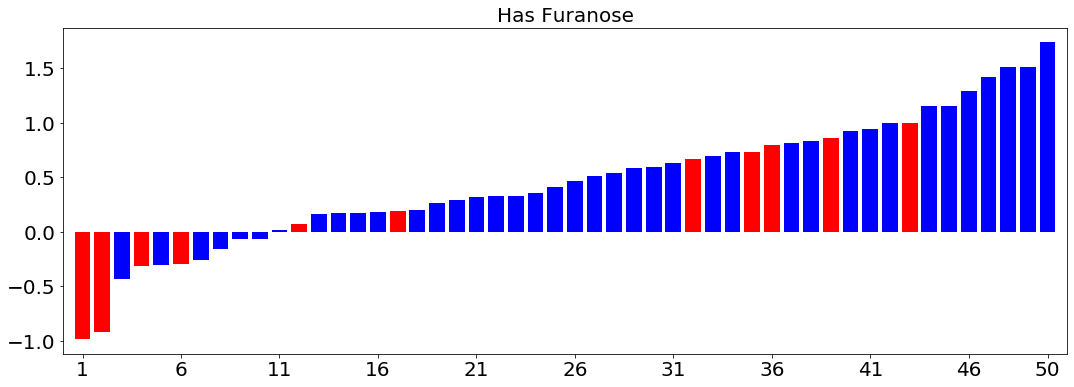

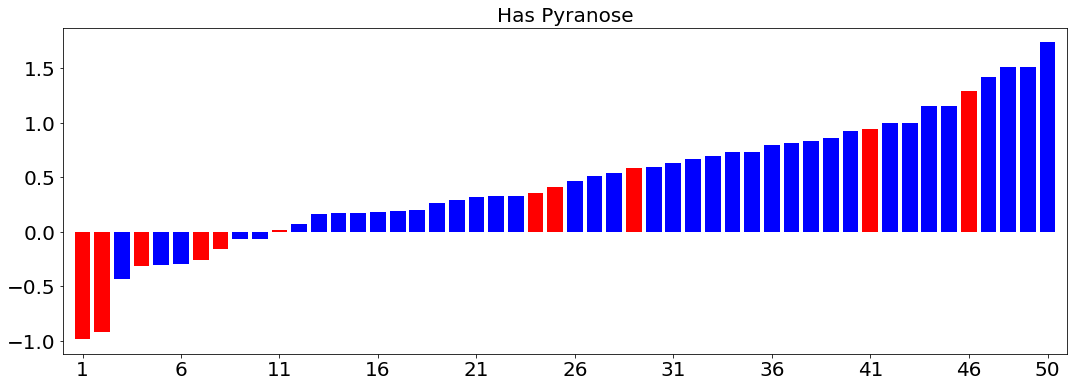

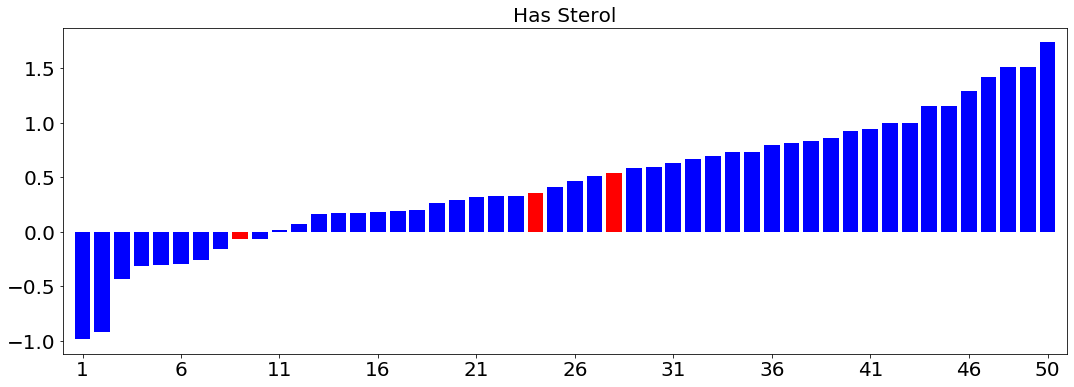

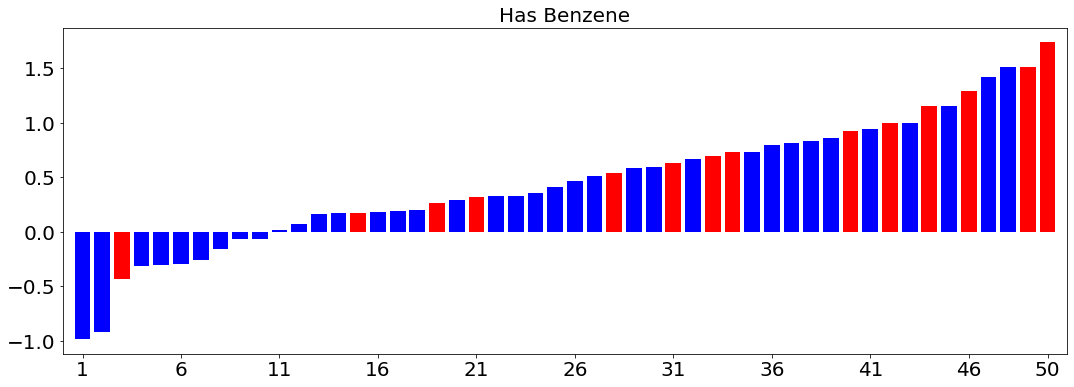

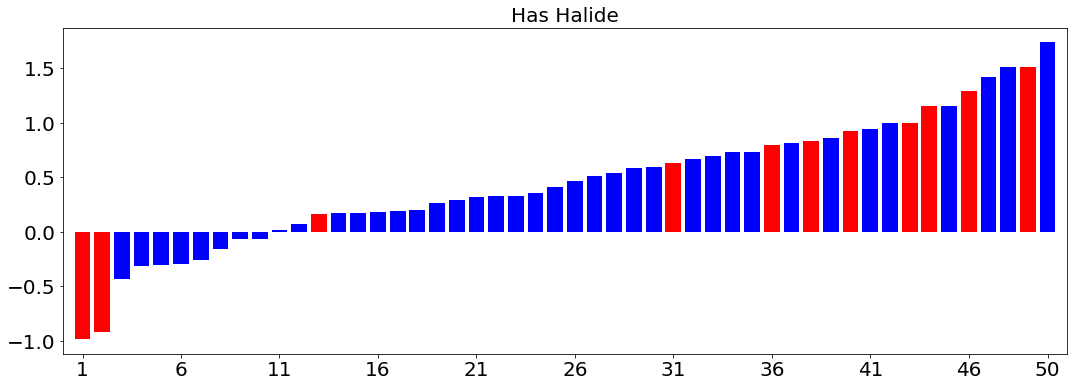

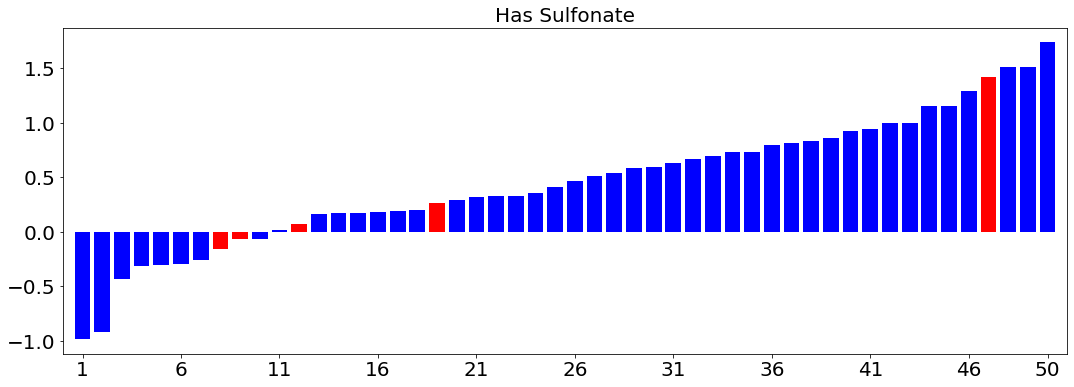

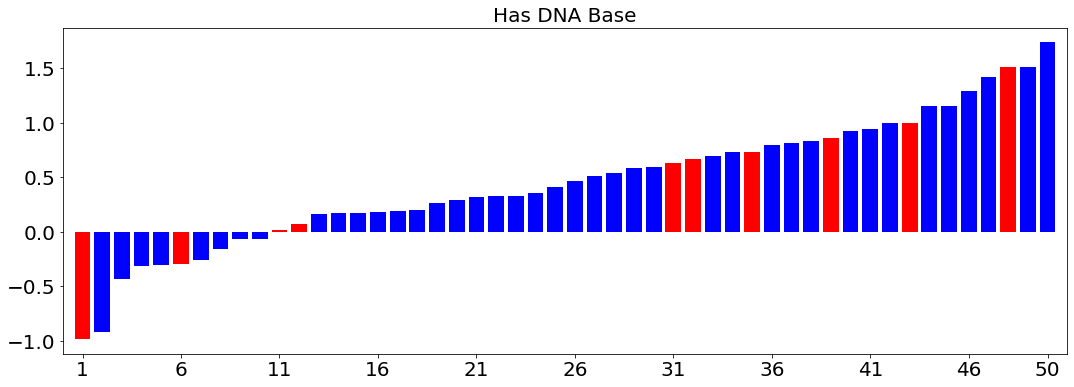

In [29]:
lig_props = ['has_phosphate','has_furanose','has_pyranose','has_sterol','has_benzene','has_halide','has_sulfonate','has_DNA_base']

# Make dictionary
titles = { i:' '.join(j.capitalize().replace('Dna','DNA') for j in i.split('_')) for i in lig_props}
for lig_prop in lig_props:
    fig, ax = plt.subplots(figsize=(18,6))

    colors = [ 'blue' if ligand_feat.loc[j][lig_prop]==0 else 'red' for j in [i[0] for i in sorted(advantages_rd1.items(),key=lambda x:x[1])] ]
    plt.bar([i+1 for i in range(len(advantages_rd1.items()))],[i[1] for i in sorted(advantages_rd1.items(),key=lambda x:x[1])]\
        ,color=colors,tick_label=None)
    #plt.xticks(rotation=90)
    plt.xticks(list(np.arange(1, 50, 5.0))+[50])
    ax.tick_params(axis="both", labelsize=20)
    plt.xlim(0,51)
    plt.title(titles[lig_prop],fontdict={'size':20})
    plt.show()

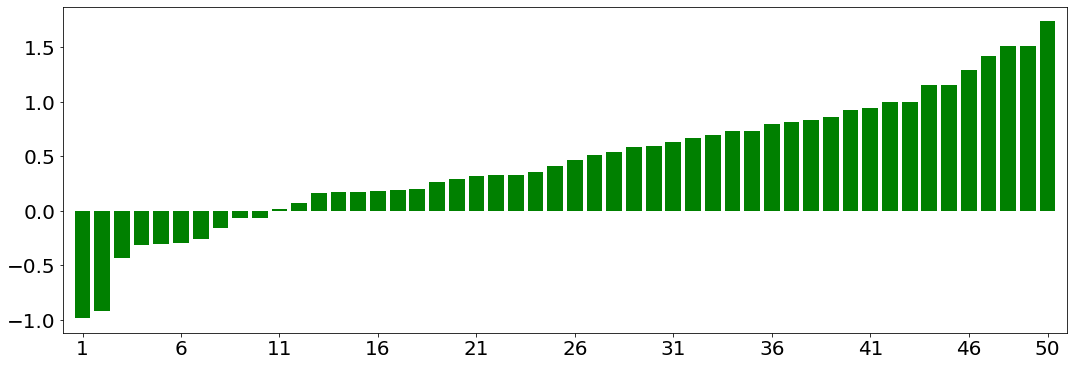

In [32]:
fig, ax = plt.subplots(figsize=(18,6))

plt.bar([i+1 for i in range(len(advantages_rd1.items()))],[i[1] for i in sorted(advantages_rd1.items(),key=lambda x:x[1])],\
        color='green',tick_label=None)
plt.xticks(list(np.arange(1, 50, 5.0))+[50])
ax.tick_params(axis="both", labelsize=20)
plt.xlim(0,51)
plt.show()

In [33]:
s_ligs = sorted(advantages_rd1.items(),key=lambda x:x[1])

In [56]:
top_docks_1rep_df['advantage'] = np.array([ advantages_rd1[i] for i in top_docks_1rep_df['ligand']])
top_docks_1rep_df['name'] = np.array([ ligand_feat.loc[i]['name'] for i in top_docks_1rep_df['ligand']])

In [59]:
top_docks_1rep_df.to_csv('./final_50_lig_docks_w_advantage.csv',sep='\t')